In [1]:
# function to read the files
def readfile(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract x and y values from the file, filtering out invalid lines
    x = []
    y = []
    for line in lines:
        values = line.split()
        if len(values) == 2:  
            try:
                x_val = float(values[0])
                y_val = float(values[1])
                x.append(x_val)
                y.append(y_val)
            except ValueError:
                continue
    # Convert lists to numpy arrays
    x = np.array(x)
    y = np.array(y)
            
    theta = np.arctan2(y, x)
    sorted_indices = np.argsort(theta)
    return np.array(x)[sorted_indices], np.array(y)[sorted_indices], np.array(theta)[sorted_indices]


def fitradius(r, theta, theta_fit):
    degree = 10
    coefficients = np.polyfit(theta, r, degree)

    return np.polyval(coefficients, theta_fit)



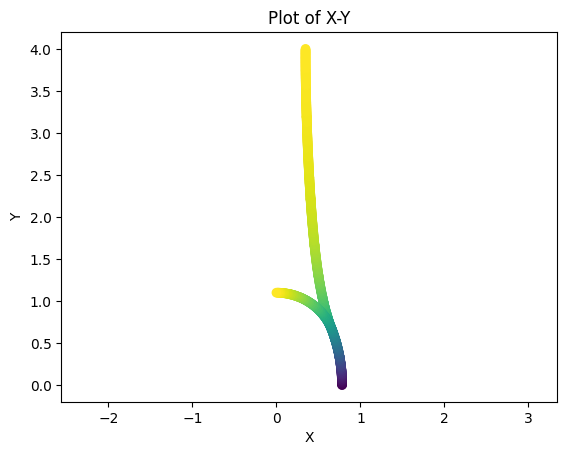

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

x1, y1, theta1 = readfile('facet1_1005')
x2, y2, theta2 = readfile('facet2_1005')



# Plot x-y values
# plt.plot(x, y, 'o')
plt.scatter(x1, y1, c=theta1, cmap='viridis')
plt.scatter(x2, y2, c=theta2, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.title('Plot of X-Y')
plt.show()

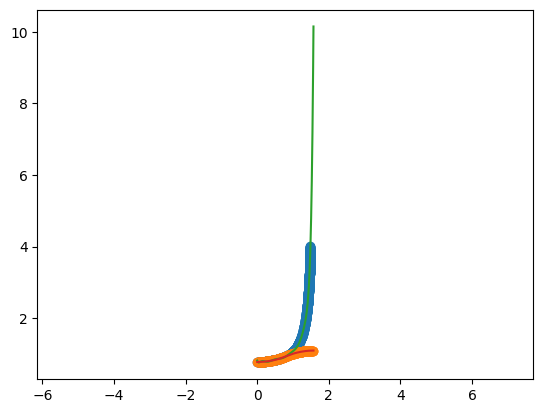

In [3]:
plt.clf()
plt.axis('equal')
r1 = np.sqrt(x1*x1+y1*y1)
plt.plot(theta1, r1, 'o')

r2 = np.sqrt(x2*x2+y2*y2)
plt.plot(theta2, r2, 'o')

theta_fit = np.linspace(0, np.pi/2, 1000)
r_fit1 = fitradius(r1, theta1, theta_fit)
r_fit2 = fitradius(r2, theta2, theta_fit)
plt.plot(theta_fit, r_fit1, '-', label='Polynomial Fit (facet1)')
plt.plot(theta_fit, r_fit2, '-', label='Polynomial Fit (facet2)')


[1.01738864]


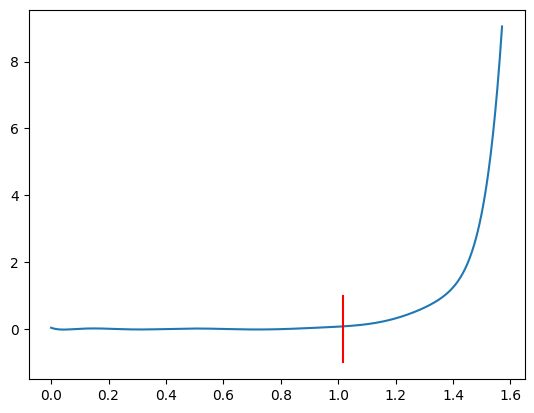

In [4]:
plt.clf()

plt.plot(theta_fit, r_fit1-r_fit2, '-', label='Polynomial Fit (facet1)')

def func(theta):
    # Interpolate r_fit1 and r_fit2 at the given theta
    r1 = np.interp(theta, theta_fit, r_fit1)
    r2 = np.interp(theta, theta_fit, r_fit2)
    return r1 - r2 - 0.08

# Find theta at which r_fit1-r_fit2 is 1e-3
theta_sol = fsolve(func, 1.2)
print(theta_sol)
plt.plot([theta_sol, theta_sol], [-1, 1], 'r-')

1.0000000000000007 -2.1415926535897927


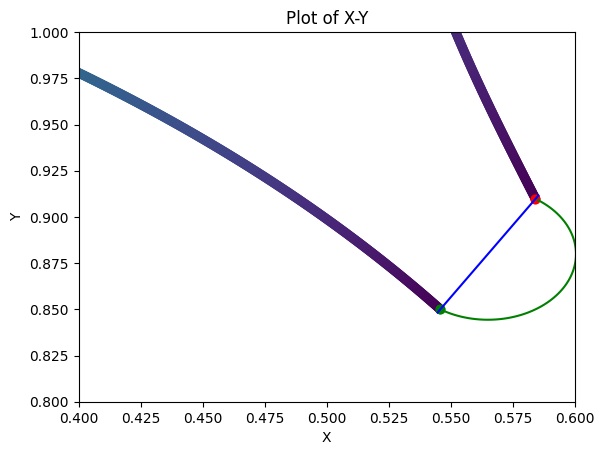

In [5]:
plt.clf()

theta_target = 1
theta_fit = np.linspace(theta_target, np.pi/2, 1000)
r_fit1 = fitradius(r1, theta1, theta_fit)

theta_fit = np.linspace(theta_target, np.pi/2, 1000)
r_fit2 = fitradius(r2, theta2, theta_fit)

x1_fit = r_fit1 * np.cos(theta_fit)
y1_fit = r_fit1 * np.sin(theta_fit)
x2_fit = r_fit2 * np.cos(theta_fit)
y2_fit = r_fit2 * np.sin(theta_fit) 

index = np.argmin(np.abs(theta_fit - theta_target))

# Extract points at theta = 0.9
x1_point = x1_fit[index]
y1_point = y1_fit[index]
x2_point = x2_fit[index]
y2_point = y2_fit[index]


# Find equation of the line passing through the two points
m = (y2_point - y1_point) / (x2_point - x1_point)
c = y1_point - m * x1_point
x_line = np.linspace(1.002*x1_point, x2_point/1.002, 200)
y_line = m * x_line + c
plt.plot(x_line, y_line, 'b-', label='Line passing through the points')

plt.scatter(x1_fit, y1_fit, c=theta_fit, cmap='viridis')
plt.scatter(x2_fit, y2_fit, c=theta_fit, cmap='viridis')

# Calculate the midpoint
midpoint_x = (x1_point + x2_point) / 2
midpoint_y = (y1_point + y2_point) / 2

# Calculate the radius
radius = np.sqrt((x2_point - x1_point)**2 + (y2_point - y1_point)**2) / 2

theta_c_1 = np.arctan2(y1_point - midpoint_y, x1_point - midpoint_x)
theta_c_2 = np.arctan2(y2_point - midpoint_y, x2_point - midpoint_x)

print(theta_c_1, theta_c_2)
# Generate points for the semi-circle
theta_semi_circle = np.linspace(theta_c_1, theta_c_2, 100)
x_semi_circle = midpoint_x + radius * np.cos(theta_semi_circle)
y_semi_circle = midpoint_y + radius * np.sin(theta_semi_circle)

# Delte the first and last points
x_semi_circle = x_semi_circle[1:-1]
y_semi_circle = y_semi_circle[1:-1]

# Plot the data points and the semi-circle
plt.plot(x_semi_circle, y_semi_circle, 'g-', label='Fitted Semi-Circle')

theta_fit = np.linspace(np.pi, theta_target, 1000)
r_fit1 = fitradius(r1, theta1, theta_fit)
x1_fit = r_fit1 * np.cos(theta_fit)
y1_fit = r_fit1 * np.sin(theta_fit)

# mask1 = y1_fit <= 4.0
# x1_fit = x1_fit[mask1]
# y1_fit = y1_fit[mask1]
# theta_fit = theta_fit[mask1]  

data1 = np.column_stack((x1_fit, y1_fit))
data2 = np.column_stack((x2_fit, y2_fit))

# data3 = np.column_stack((x_line, y_line))
data3 = np.column_stack((x_semi_circle, y_semi_circle))

# Save the combined array to a text file
np.savetxt('f3.txt', np.vstack((data1, data3, data2)), delimiter='\t')


plt.scatter(x1_point, y1_point, c='r', s=40, label='Point 1')
plt.scatter(x2_point, y2_point, c='green', s=40, label='Point 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of X-Y')
# plt.axis('equal')
# plt.ylim(0,4)
# plt.xlim(0,4)
plt.ylim(0.8,1)
plt.xlim(0.4,0.6)
plt.show()